<a href="https://colab.research.google.com/github/zarrinan/DS-Sprint-01-Dealing-With-Data/blob/master/Optional_additional_answers_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# TODO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
bc = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data')
! curl http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data

In [22]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data | wc
!ls

--2018-11-09 21:22:07--  http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103 (3.0K) [text/plain]
Saving to: ‘haberman.data’

haberman.data       100%[===================>]   3.03K  --.-KB/s    in 0s      

2018-11-09 21:22:07 (273 MB/s) - ‘haberman.data’ saved [3103/3103]

      0       0       0
haberman.data  sample_data


In [23]:
print(bc.shape)
print(bc.info())
print(bc.describe())
bc.head()

(305, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
30     305 non-null int64
64     305 non-null int64
1      305 non-null int64
1.1    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None
               30          64           1         1.1
count  305.000000  305.000000  305.000000  305.000000
mean    52.531148   62.849180    4.036066    1.265574
std     10.744024    3.254078    7.199370    0.442364
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     61.000000   66.000000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year

In [0]:
col_names = ['age', 'operation year 1900+', 'pos nodes', 'survival status']

In [0]:
bcs = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None, names=col_names)
#optional:
#bcs = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', 
#header=None, names=['age', 'operation year 1900+', 'pos nodes', 'survival status'] 

In [0]:
print(bcs.shape)
print(bcs.info())
print(bcs.describe())
bcs.head()

In [27]:
bcs.isna().sum().sum()

0

In [0]:
bcs['if_survived'] = bcs['survival status'].apply(lambda val: 0 if val == 2 else 1)
#optional:
#bcs['survival status'].replace(2,0,inplace=True)


In [0]:
bcs.head(15)

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [30]:
# TODO
bcs.describe()

,age,operation year 1900+,pos nodes,survival status,if_survived
count,306.000000,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706,0.735294
std,10.803452,3.249405,7.189654,0.441899,0.441899
min,30.000000,58.000000,0.000000,1.000000,0.000000
25%,44.000000,60.000000,0.000000,1.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000,1.000000
max,83.000000,69.000000,52.000000,2.000000,1.000000


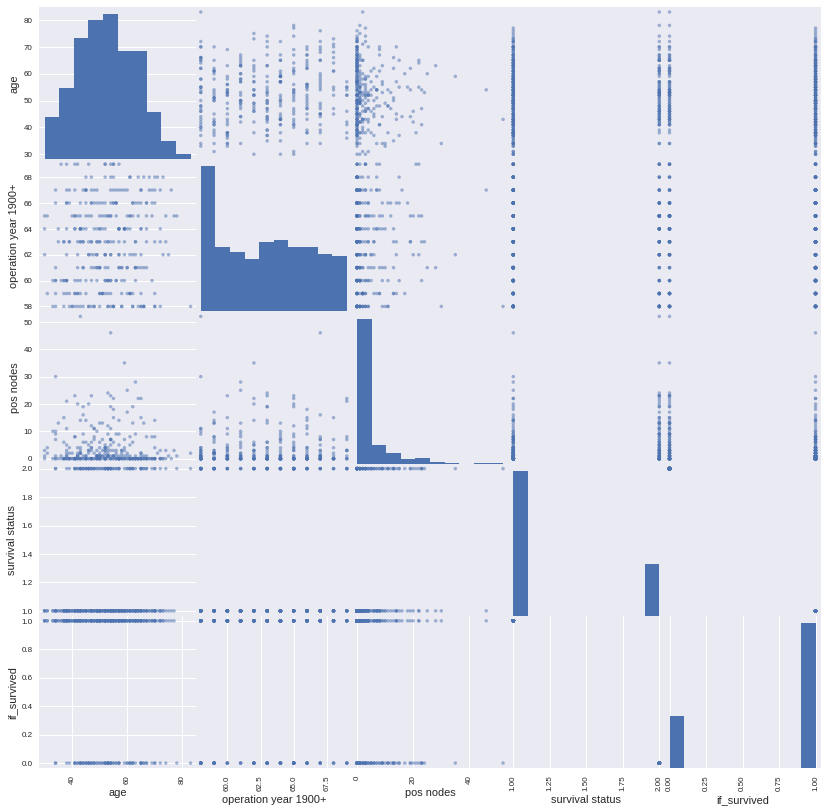

In [61]:
pd.plotting.scatter_matrix(bcs, figsize=(14, 14), range_padding=0.07, grid=True, alpha=0.5);


In [62]:
bcs['if_survived'].value_counts()/len(bcs['if_survived'])

1    0.735294
0    0.264706
Name: if_survived, dtype: float64

In [0]:
oper_year_bin = pd.cut(bcs['operation year 1900+'], bins=[0, 58, 61, 63, 65, 69])
age_bin = pd.cut(bcs['age'], bins=[0, 30, 35, 41,42,43, 44,45,46, 51,54, 57, 62, 67, 73, 78, 83])
pos_nodes_bin = pd.cut(bcs['pos nodes'], 5)
#optional: nodes could be divided into bins until 5, 5-10, and the rest
pos_nodes_bin2 = pd.cut(bcs['pos nodes'], bins=[-1, 5, 10, 100])


In [37]:
pd.crosstab(bcs['if_survived'], oper_year_bin, normalize='columns')

operation year 1900+,"(0, 58]","(58, 61]","(61, 63]","(63, 65]","(65, 69]"
if_survived,,,,,
0,0.333333,0.197531,0.283019,0.355932,0.220779
1,0.666667,0.802469,0.716981,0.644068,0.779221


In [38]:
pd.crosstab(bcs['if_survived'], bcs['operation year 1900+'], normalize='columns')

operation year 1900+,58,59,60,61,62,63,64,65,66,67,68,69
if_survived,,,,,,,,,,,,
0,0.333333,0.333333,0.142857,0.115385,0.304348,0.266667,0.258065,0.464286,0.214286,0.16,0.230769,0.363636
1,0.666667,0.666667,0.857143,0.884615,0.695652,0.733333,0.741935,0.535714,0.785714,0.84,0.769231,0.636364


In [39]:
pd.crosstab(bcs['if_survived'], age_bin, normalize='columns')

age,"(0, 30]","(30, 35]","(35, 41]","(41, 42]","(42, 43]","(43, 44]","(44, 45]","(45, 46]","(46, 51]","(51, 54]","(54, 57]","(57, 62]","(62, 67]","(67, 73]","(73, 78]","(78, 83]"
if_survived,,,,,,,,,,,,,,,,
0,0.0,0.153846,0.135135,0.222222,0.363636,0.428571,0.333333,0.571429,0.26087,0.368421,0.25,0.243243,0.264706,0.2,0.333333,1.0
1,1.0,0.846154,0.864865,0.777778,0.636364,0.571429,0.666667,0.428571,0.73913,0.631579,0.75,0.756757,0.735294,0.8,0.666667,0.0


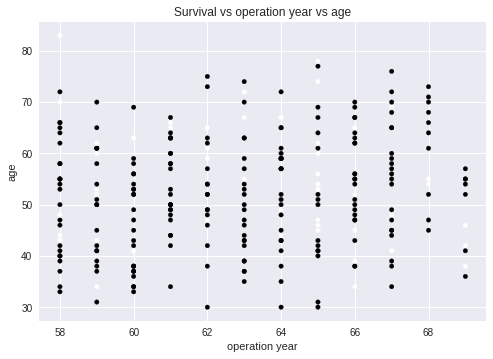

In [41]:
pointsize = 20;
plt.xlabel('operation year')
plt.ylabel('age')
plt.title('Survival vs operation year vs age')
plt.scatter(bcs['operation year 1900+'], bcs['age'], pointsize, bcs['if_survived']);

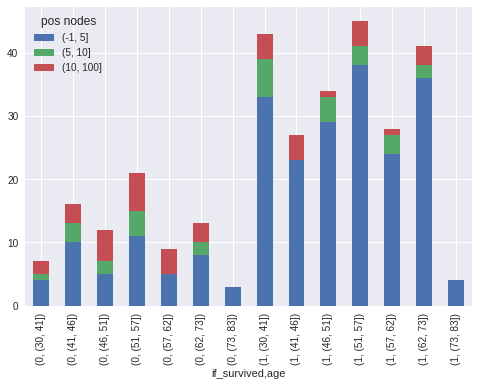

In [81]:
nodes_survival = pd.crosstab([bcs['if_survived'], age_bin2], pos_nodes_bin2)
nodes_survival.plot(kind='bar', stacked=True)

In [0]:
age_bin2 = pd.cut(bcs['age'], bins=[30, 41, 46, 51, 57, 62, 73, 83])

#optional graph on nodes vs survival relationship
ds_n = pd.crosstab([age_bin2, pos_nodes_bin2], bcs['if_survived'])
ds_n

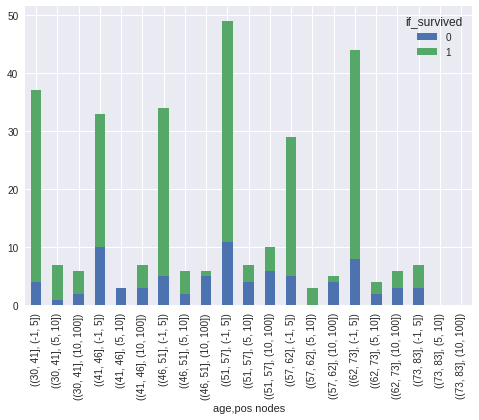

In [84]:
ds_n.plot(kind='bar', stacked=True)

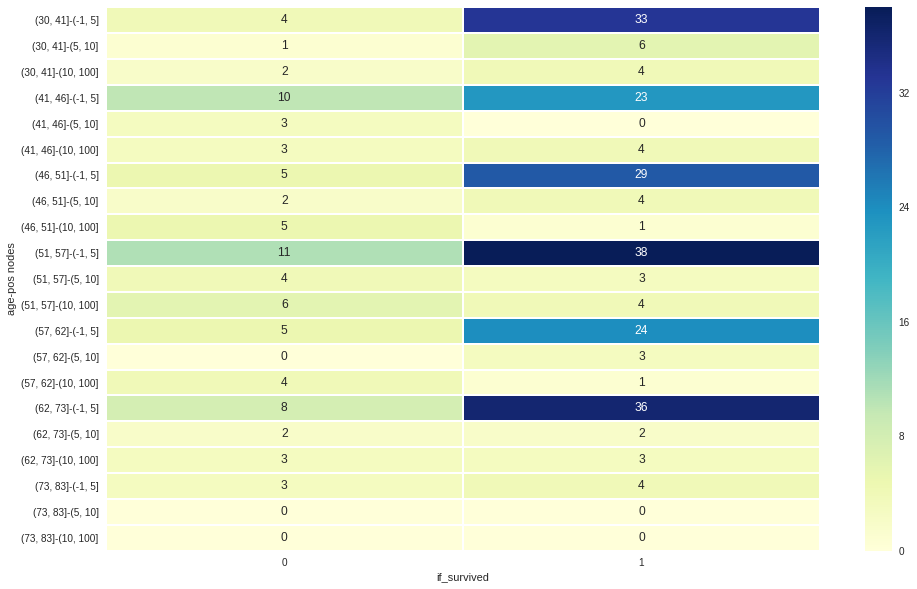

In [87]:
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(ds_n, annot=True, linewidths=1, cmap="YlGnBu", ax=ax);

In [0]:
#The data above shows that 58-59 and 65 years of operation are the years when the
#survival rate is lower, will try to figure out the reason

is_58 =  bcs['operation year 1900+'] <= 59
is_65 = bcs['operation year 1900+'] == 65

In [0]:
bcs_58 = bcs[is_58]
bcs_65 = bcs[is_65]

In [0]:
print(bcs['if_survived'].value_counts()/len(bcs['if_survived']))
print(bcs_58['if_survived'].value_counts()/len(bcs_58['if_survived']))
print(bcs_65['if_survived'].value_counts()/len(bcs_65['if_survived']))


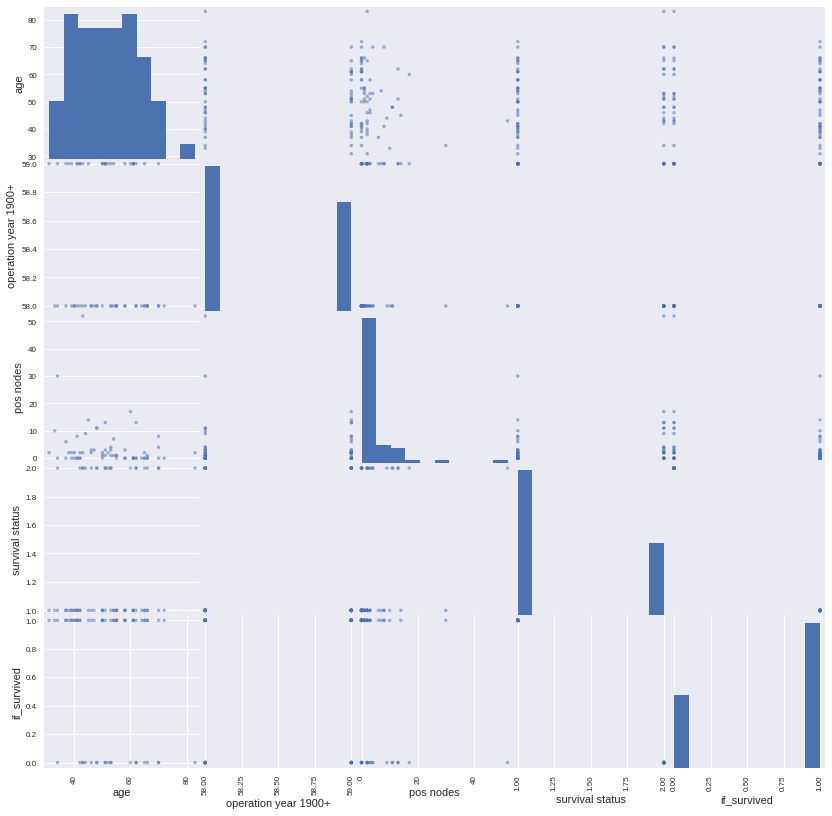

In [91]:
pd.plotting.scatter_matrix(bcs_58, figsize=(14, 14), range_padding=0.07, grid=True, alpha=0.5);

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=65.0, right=65.0
  'left=%s, right=%s') % (left, right))
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=65.0, top=65.0
  'bottom=%s, top=%s') % (bottom, top))


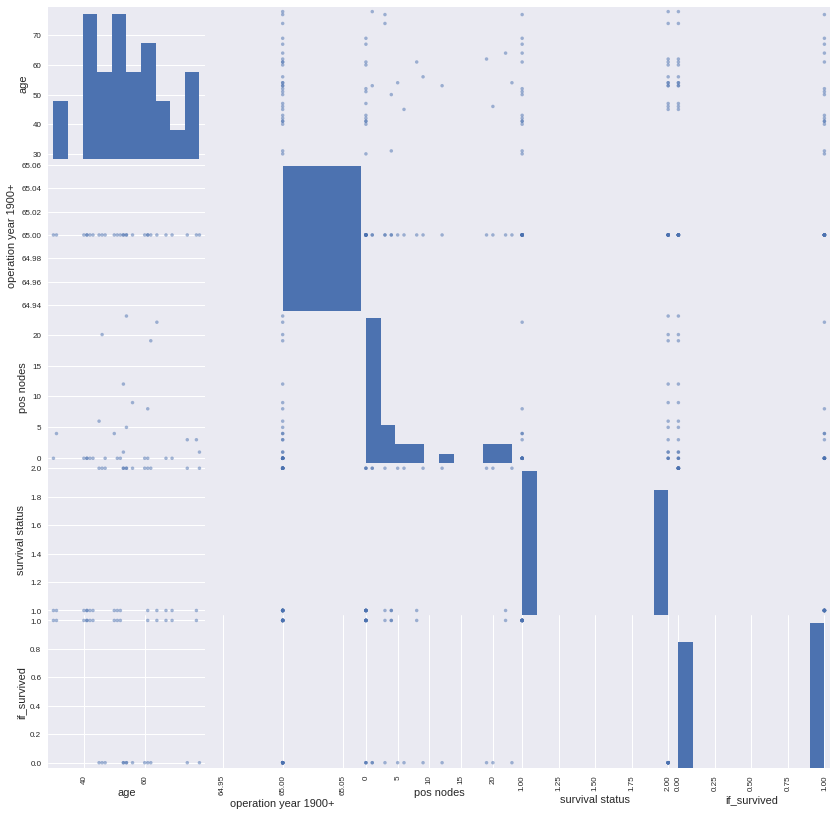

In [92]:
pd.plotting.scatter_matrix(bcs_65, figsize=(14, 14), range_padding=0.07, grid=True, alpha=0.5);

In [0]:
bcs['age'].describe()

In [0]:
bcs_58['age'].describe()

In [0]:
bcs_65['age'].describe()

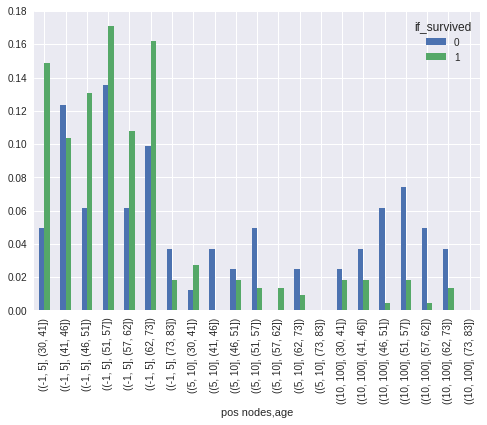

In [93]:
ds_65 = pd.crosstab([pos_nodes_bin2, age_bin2], bcs['if_survived'], normalize='columns')
ds_65.plot(kind='bar', stacked=False)

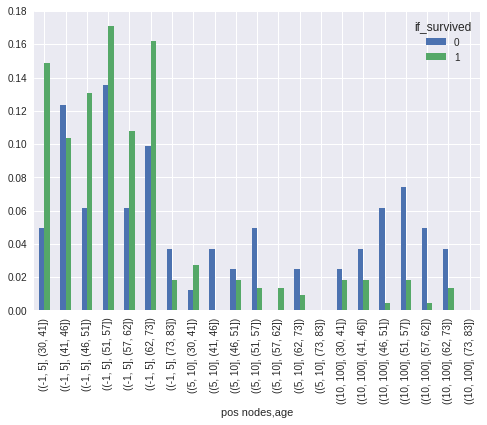

In [94]:
ds_58 = pd.crosstab([pos_nodes_bin2, age_bin2], bcs['if_survived'], normalize='columns')
ds_58.plot(kind='bar', stacked=False)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?
- What is at least one feature that looks to have a negative correlation with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Patients, who were operated before 41 years old, or after 78 years old, tend to survive more often. The data shows that after the age of 41 the probability of survival after a breast cancer operation  drops dramatically, from 86%  for patients before 41 years old, to 77% at the age of 41 and 42% at the age of 46. 
The number of positive axillary nodes are the highest at the age ranges where survival probability is low. The features contributing to nonsurvival rate have positive correlation, they are confounding. More domain specific data is required to detect which of the features cause another one, at the same time following intuitive logic, age might be the factor causing the number of positive axillary nodes to increase.

There are drops in the survival rates in 58-59 and 65 years, to 66% and 53% respectively. The age distribution for those year shows almost no difference with the rest data, additional factors should be investigated for those years, maybe medicine used, new surgeon practices, etc.